In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = 'https://raw.githubusercontent.com/Lawrence-Krukrubo/Immigrations_Data_Visualization_with_Matplotlib/master/part3_canada_df.csv'

# Let's see the first few rows of the data

canada_df = pd.read_csv(data)
canada_df.head()

,Country,Continent,Region,Status,1980,1981,1982,1983,1984,1985,...,2006,2007,2008,2009,2010,2011,2012,2013,Total,Migration_Rate
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3009,2652,2111,1746,1758,2203,2635,2004,58639,Low
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,856,702,560,716,561,539,620,603,15699,Low
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,4807,3623,4005,5393,4752,4325,3774,4331,69439,Low
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,6,Low
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1,15,Low


In [2]:
years = [str(year) for year in range(1980,2014)]
canada_df.set_index('Country', drop=True, inplace=True)

In [4]:
dict_ = {'fontsize': 14,
        'family': 'serif',
        'fontweight': 'bold',
        'verticalalignment': 'baseline',
        'color': 'darkred'}

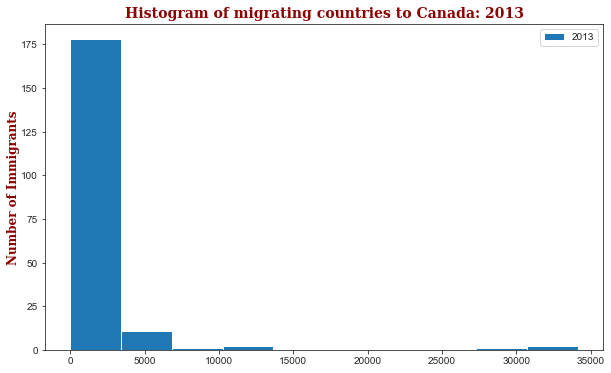

In [5]:
sns.set_style('ticks')
df_2013 = canada_df[['2013']]
df_2013.plot(kind='hist', figsize=(10,6))

plt.title('Histogram of migrating countries to Canada: 2013',
         fontdict=dict_)

dict_['fontsize'] = 12
plt.ylabel('Number of Immigrants', fontdict=dict_)
plt.show()

In [6]:
count, bin_edges = np.histogram(df_2013['2013'])
print('Count is:', count, 'and Bin-edges is:', bin_edges)

Count is: [178  11   1   2   0   0   0   0   1   2] and Bin-edges is: [    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


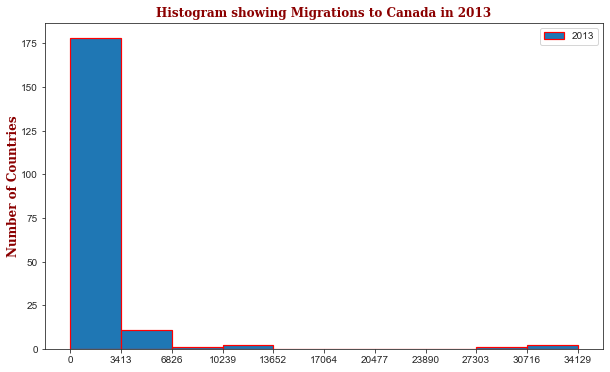

In [7]:
df_2013.plot(kind='hist', figsize=(10, 6), xticks=bin_edges,
            edgecolor='red', linewidth=1.2)

plt.title('Histogram showing Migrations to Canada in 2013',
         fontdict=dict_)

dict_['fontsize'] = 12
plt.ylabel('Number of Countries', fontdict=dict_)

plt.show()

In [8]:
df_NigGhaKen = canada_df.loc[['Nigeria', 'Ghana', 'Kenya'], 
                            years]

df_NigGhaKen = df_NigGhaKen.T

In [9]:
nigeria_bin1 = [i for i in df_NigGhaKen['Nigeria']
               if i >= 58 and i <= 470]
ghana_bin1 = [i for i in df_NigGhaKen['Ghana'] 
             if i >= 58 and i <= 470]
kenya_bin1 = [i for i in df_NigGhaKen['Kenya'] 
             if i >= 58 and i <= 470]

print(f'Nigeria = {len(nigeria_bin1)},\nGhana = {len(ghana_bin1)},\nKenya = {len(kenya_bin1)}.')

Nigeria = 15,
Ghana = 10,
Kenya = 15.


In [24]:
# Stacked histograms
top_5 = canada_df.sort_values(by='Total', ascending=False)

top_5 = top_5.iloc[:5,3:8].T

top_5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


In [25]:
top_5.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'United_Kingdom(GB/NI)'}, inplace=True)

In [26]:
count, bin_edges = np.histogram(top_5, 15)

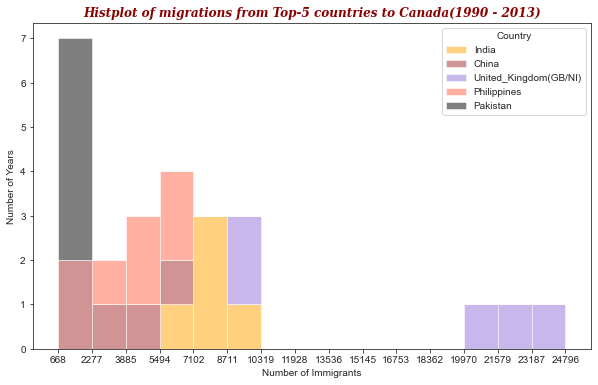

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

top_5.plot.hist(xticks=bin_edges,
               stacked=True,
               alpha=0.5,
               color=['orange', 'brown', 'mediumpurple',
                     'tomato','black'],
               figsize=(10,6),
               bins=len(count),
               ax = ax)

ax.set_title('Histplot of migrations from Top-5 countries to Canada(1990 - 2013)', 
             fontstyle='italic', fontdict=dict_)
ax.set_ylabel('Number of Years')
ax.set_xlabel('Number of Immigrants')
             
plt.show()             